# Rough Clean Data

In [2]:
import pandas as pd

accident_df = pd.read_csv('../../FARS2020NationalCSV/accident.csv', encoding = 'ISO-8859-1')
person_df = pd.read_csv('../../FARS2020NationalCSV/person.csv', encoding = 'ISO-8859-1')

merge_df = pd.merge(accident_df, person_df, on = "ST_CASE", how = 'inner')


In [3]:
columns_to_keep = [
    # Driver-Specific Information
    'AGE', 'SEX', 'DRINKING', 'DRUGS', 'ALC_DET', 'ALC_STATUS', 
    'DRUG_DET', 'DSTATUS', 'INJ_SEV', 'PER_TYP', 'DAY_WEEK', 'HOUR_x', 'WEATHER', 'LGT_COND','STATE_x'
]

# Keeping only the selected columns and dropping the rest
merge_df = merge_df[columns_to_keep]


In [4]:
output_file_path = 'Data/PCA_data.csv'
merge_df.to_csv(output_file_path)
output_file_path

'Data/PCA_data.csv'

# PCA

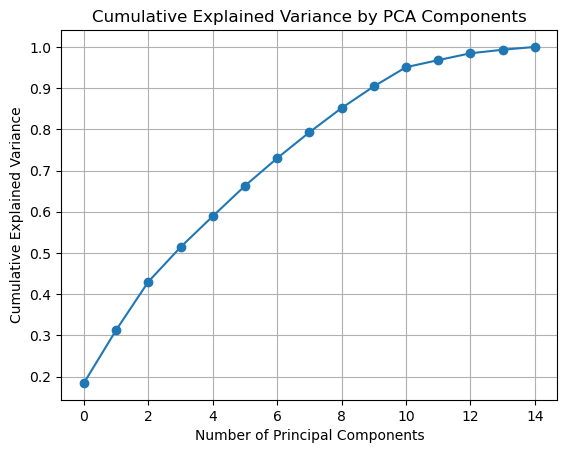

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
data = merge_df
scaler = StandardScaler()
scaled_pca_data = scaler.fit_transform(data)

# Re-applying PCA
pca = PCA()
pca_transformed_data = pca.fit_transform(scaled_pca_data)

# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Displaying the first few principal components' explained variance
explained_variance_ratio, cumulative_explained_variance
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()



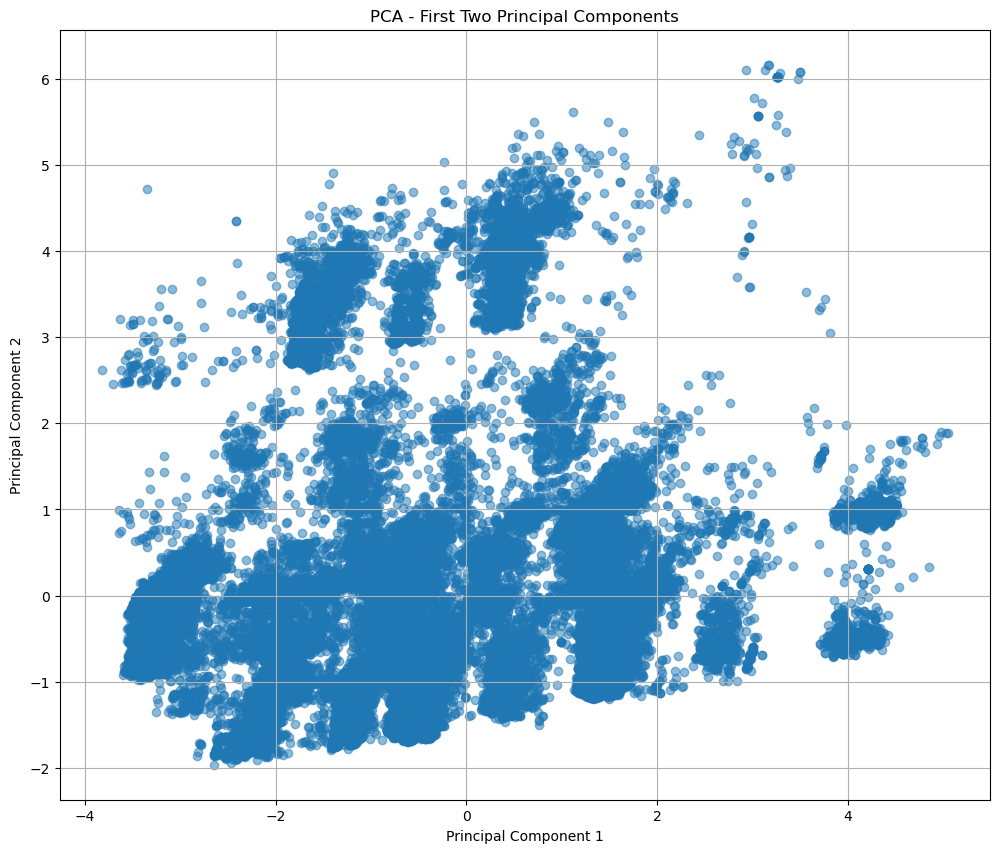

In [19]:
pc1 = pca_transformed_data[:, 0]  
pc2 = pca_transformed_data[:, 1]  


plt.figure(figsize=(12, 10))
plt.scatter(pc1, pc2, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.grid(True)
plt.show()



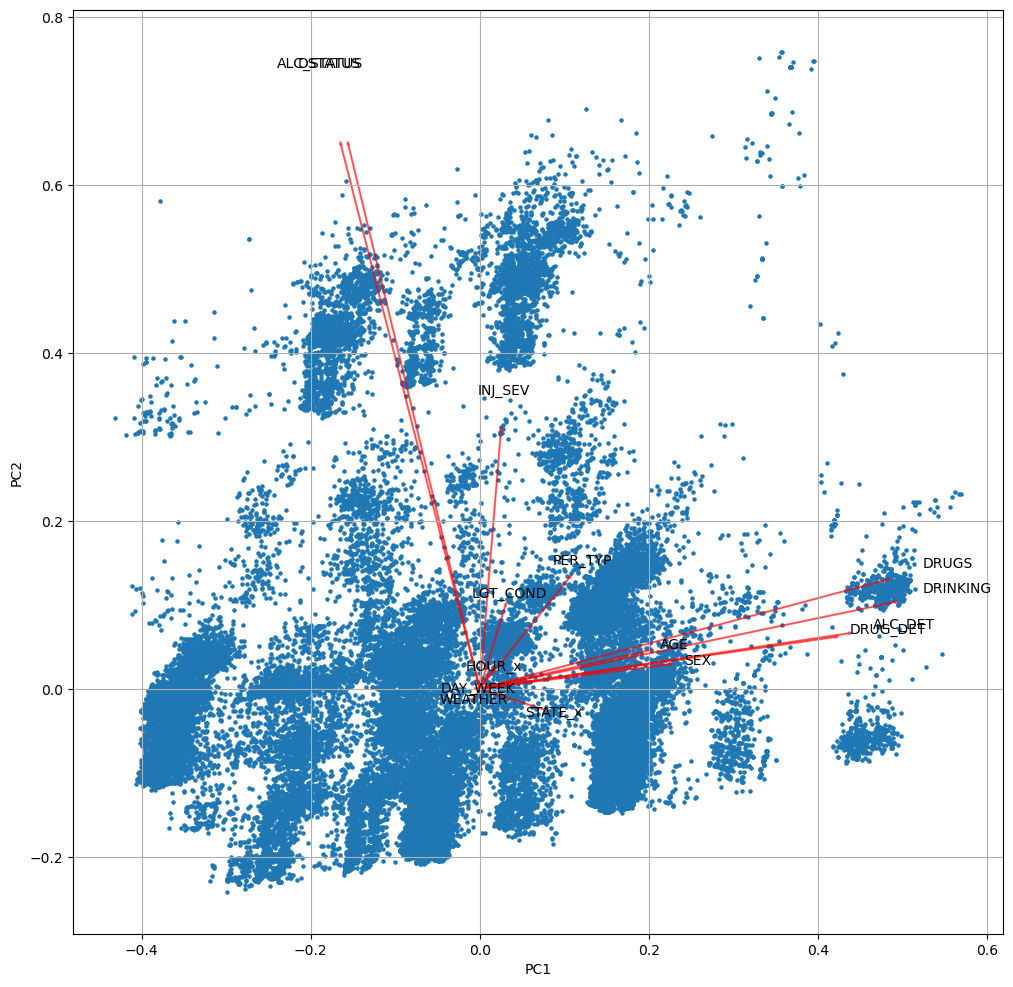

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    plt.scatter(xs * scalex, ys * scaley, s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='black', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='black', ha='center', va='center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# PCA scores (the transformed data points)
pca_scores = pca_transformed_data

# PCA loadings (the contributions of the original variables to the components)
pca_loadings = pca.components_

plt.figure(figsize=(12,12))
biplot(pca_scores, pca_loadings.transpose(), labels=data.columns)
plt.show()


# t-SNE

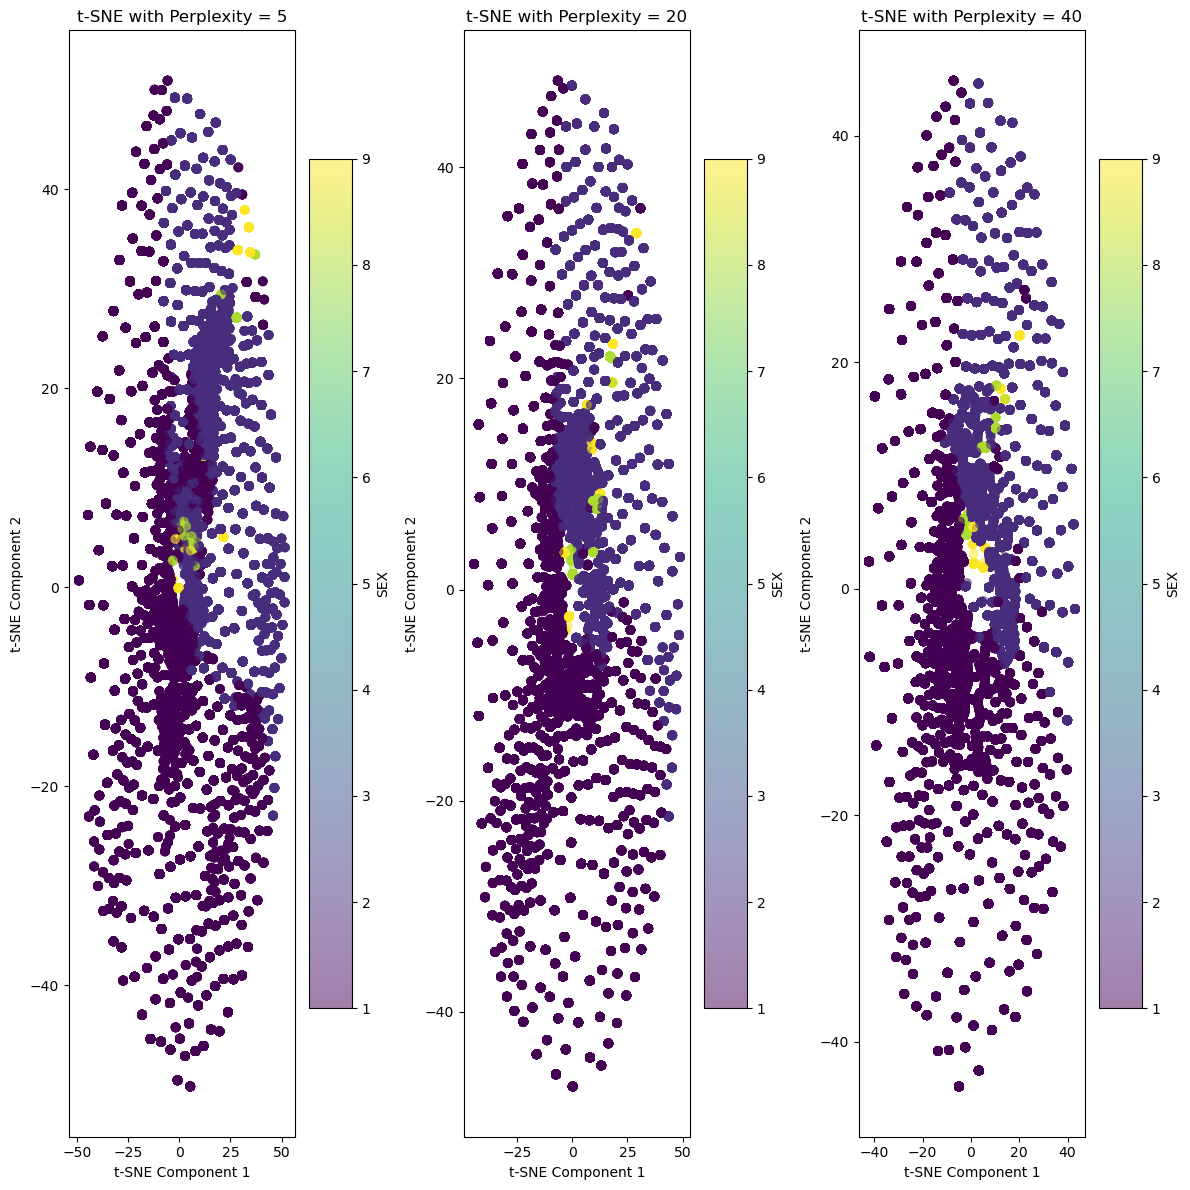

In [18]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

subset_data = data[['AGE', 'SEX', 'DRINKING', 'DRUGS']]

imputer = SimpleImputer(strategy='median')
df_imputed = imputer.fit_transform(subset_data)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)
perplexities = [5, 20, 40]

plt.figure(figsize=(12,12))  # Set the figure size for the subplot layout

for i, perp in enumerate(perplexities, 1):
    tsne = TSNE(n_components=2, perplexity=perp, n_iter=300, random_state=42)
    tsne_results = tsne.fit_transform(df_scaled)
    
    plt.subplot(1, len(perplexities), i)
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5, c= subset_data['SEX'], cmap='viridis')
    plt.title(f't-SNE with Perplexity = {perp}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.colorbar(scatter, label='SEX')

plt.tight_layout()
plt.show()